In [3]:
%load_ext autoreload
%autoreload 2

from src.config import*
from src.dataset import*
from src.model import*
from src.train import*
from src.vizualization import*
from src.preprocessing import*
from src.metrics import*
from torch import utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
cfg

{'encoder': 'timm-efficientnet-b0',
 'weights': 'imagenet',
 'resize': 224,
 'nb_classes': 1,
 'epochs': 100,
 'lr': 0.001,
 'gamma': 0.85,
 'batch_size': 5}

In [5]:
path = '/home/ters-user/Documents/particle_recognition_using_CNN/dataset/'

all_images = sorted([os.path.join(path,img) for img in sorted(os.listdir(path)) if img.endswith('.png') and 'mask' not in img])
all_masks = sorted([os.path.join(path,img) for img in sorted(os.listdir(path)) if img.endswith('.png') and 'mask' in img])

In [6]:
DEVICE  = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
BATCH_SIZE = cfg['batch_size']
LR = cfg['lr']
EPOCHS = cfg['epochs']
ENCODER = cfg['encoder']
ENCODER_WEIGHTS = cfg['weights']
RESIZE = cfg['resize']

In [7]:
trainset = ParticulSegmentation(all_images[:70],all_masks[:70],get_train_augs(RESIZE))
testset = ParticulSegmentation(all_images[70:],all_masks[70:],get_train_augs(RESIZE))

In [8]:
print(f'Len of Trainset : {len(trainset)}')

Len of Trainset : 70


In [9]:
trainset[0]

(tensor([[[0.7608, 0.7451, 0.7529,  ..., 0.7176, 0.7176, 0.7176],
          [0.7608, 0.7451, 0.7529,  ..., 0.7176, 0.7176, 0.7176],
          [0.7529, 0.7647, 0.7529,  ..., 0.7294, 0.7137, 0.7137],
          ...,
          [0.7176, 0.7216, 0.7216,  ..., 0.7333, 0.7098, 0.7098],
          [0.7020, 0.7137, 0.7255,  ..., 0.7451, 0.7176, 0.7176],
          [0.7451, 0.7333, 0.7294,  ..., 0.7176, 0.7294, 0.7294]]]),
 tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 '/home/ters-user/Documents/particle_recognition_using_CNN/dataset/30mM(2)_0.25_0.000.png',
 '/home/ters-user/Documents/particle_recognition_using_CNN/dataset/30mM(2)_0.25_0.000_mask.png')

In [10]:
dloader_train = torch.utils.data.DataLoader(trainset,batch_size=BATCH_SIZE,shuffle=True)
dloader_test = torch.utils.data.DataLoader(testset,batch_size=BATCH_SIZE,shuffle=False)

In [11]:
iterator = iter(dloader_train)
images, masks, image_paths, mask_paths = next(iterator)

In [12]:
image_paths

('/home/ters-user/Documents/particle_recognition_using_CNN/dataset/30mM(2)_0.5_246.000.png',
 '/home/ters-user/Documents/particle_recognition_using_CNN/dataset/30mM(2)_0.5_264.000.png',
 '/home/ters-user/Documents/particle_recognition_using_CNN/dataset/30mM(2)_0.25_3.000.png',
 '/home/ters-user/Documents/particle_recognition_using_CNN/dataset/30mM(2)_0.25_59.000.png',
 '/home/ters-user/Documents/particle_recognition_using_CNN/dataset/30mM(2)_0.5_181.000.png')

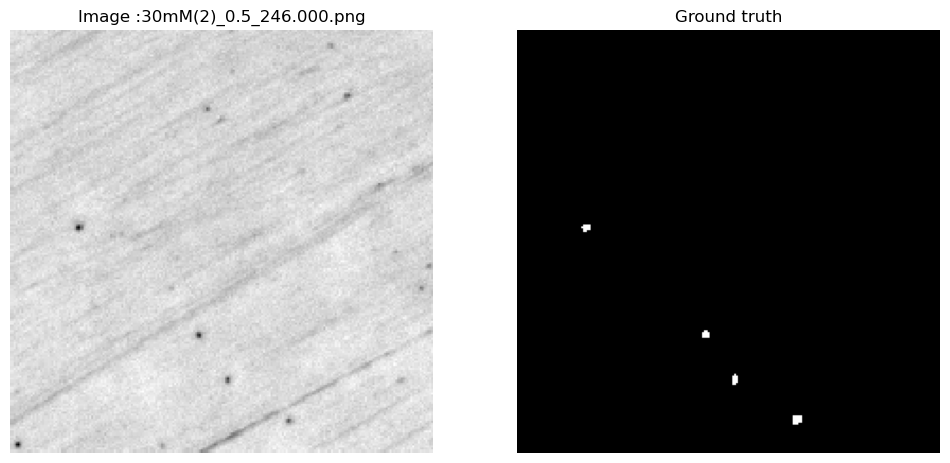

In [13]:
show_images(dloader_train)

In [14]:
model, loss, optimizer = create_model(cfg)

In [15]:
test()

100%|██████████| 14/14 [00:01<00:00,  9.65it/s]


SAVE MODEL WITH LOSS : 0.427585631608963


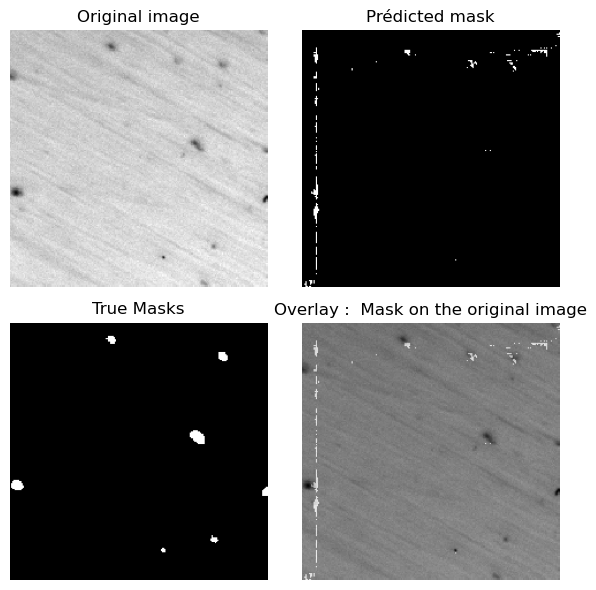

Epoch 1 Train Loss 0.5261013273681913 Test loss 0.427585631608963


100%|██████████| 14/14 [00:01<00:00, 11.64it/s]


SAVE MODEL WITH LOSS : 0.13634494319558144


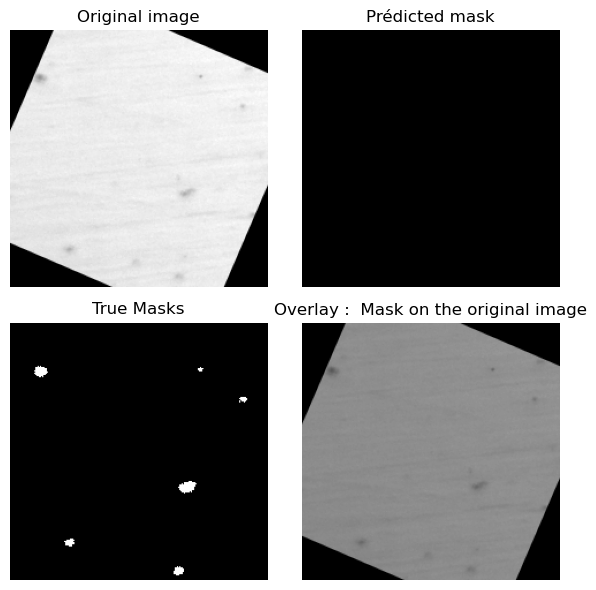

Epoch 2 Train Loss 0.22816951040710723 Test loss 0.13634494319558144


100%|██████████| 14/14 [00:01<00:00, 11.79it/s]


SAVE MODEL WITH LOSS : 0.10538009678324063


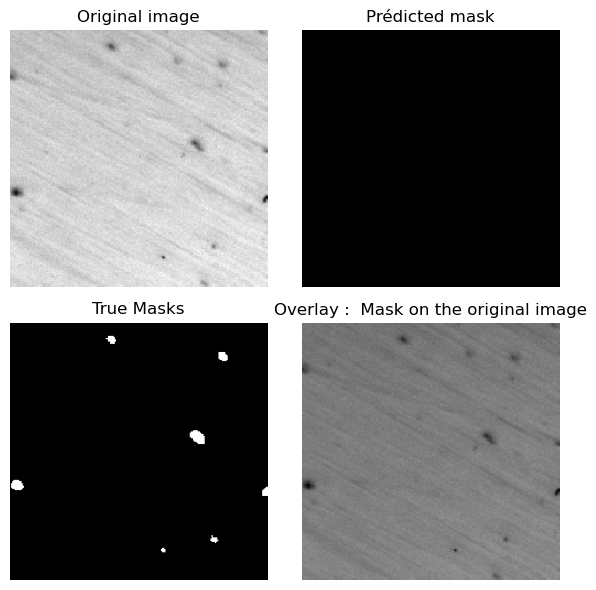

Epoch 3 Train Loss 0.1239614204636642 Test loss 0.10538009678324063


100%|██████████| 14/14 [00:01<00:00, 11.72it/s]


SAVE MODEL WITH LOSS : 0.07647345090905826


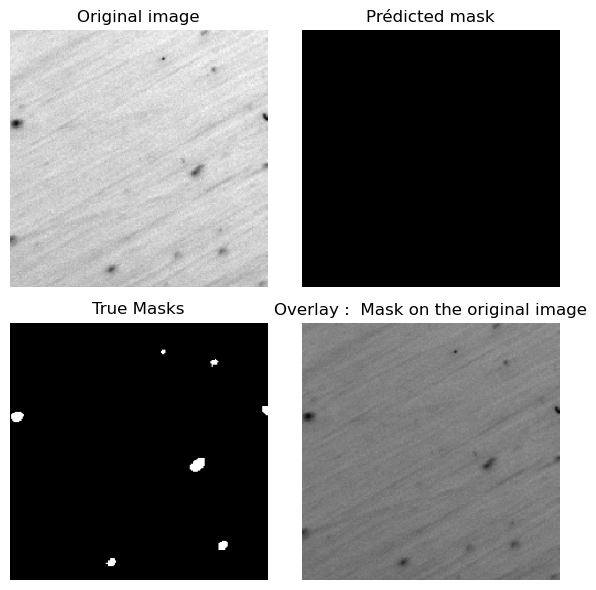

Epoch 4 Train Loss 0.08145320894462722 Test loss 0.07647345090905826


100%|██████████| 14/14 [00:01<00:00, 11.59it/s]


SAVE MODEL WITH LOSS : 0.06074655304352442


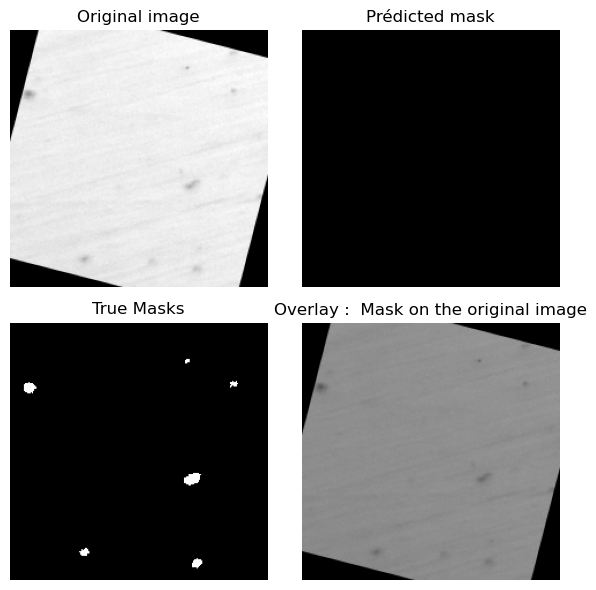

Epoch 5 Train Loss 0.05879567111177104 Test loss 0.06074655304352442


100%|██████████| 14/14 [00:01<00:00, 11.70it/s]


SAVE MODEL WITH LOSS : 0.051130316530664764


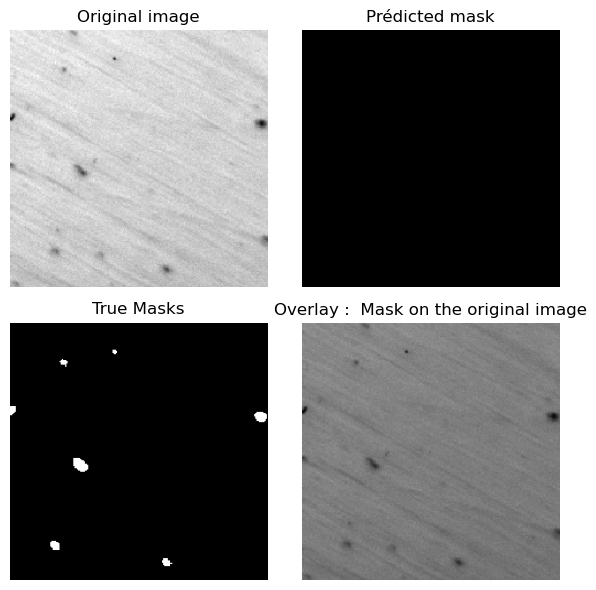

Epoch 6 Train Loss 0.04620409570634365 Test loss 0.051130316530664764


100%|██████████| 14/14 [00:01<00:00, 11.72it/s]


SAVE MODEL WITH LOSS : 0.04141299488643805


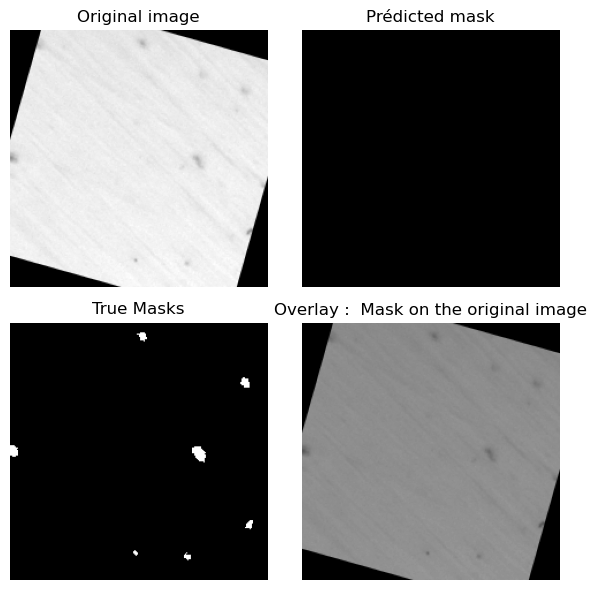

Epoch 7 Train Loss 0.03760496327387435 Test loss 0.04141299488643805


100%|██████████| 14/14 [00:01<00:00, 11.56it/s]


SAVE MODEL WITH LOSS : 0.03347156041612228


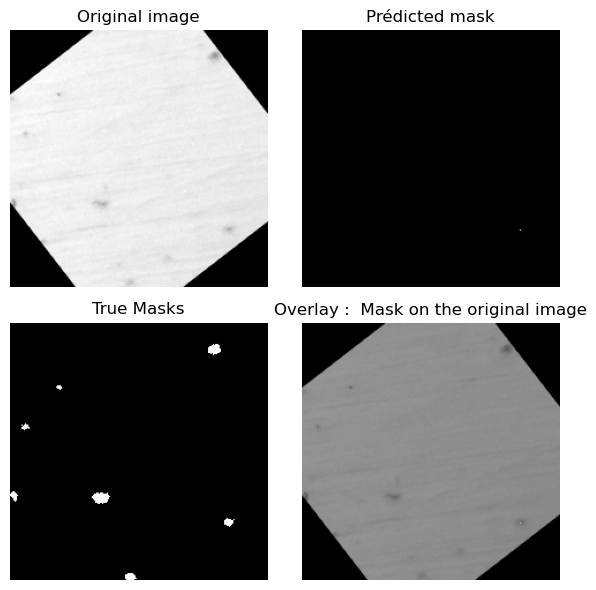

Epoch 8 Train Loss 0.03180792874523571 Test loss 0.03347156041612228


100%|██████████| 14/14 [00:01<00:00, 11.49it/s]


SAVE MODEL WITH LOSS : 0.03288043135156234


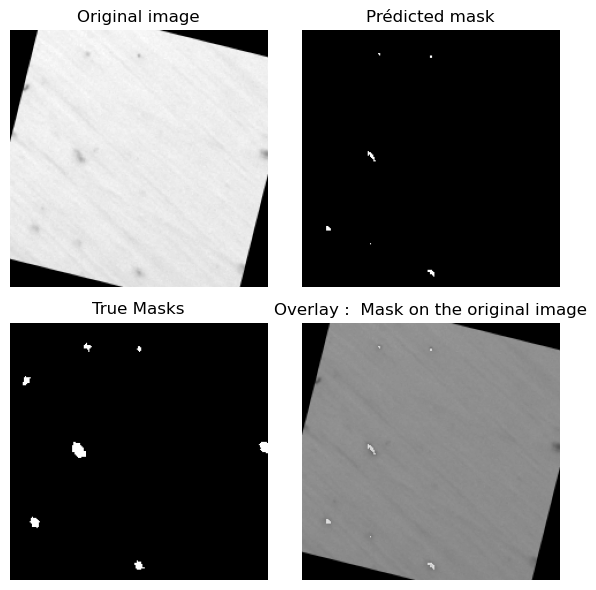

Epoch 9 Train Loss 0.027892845682799816 Test loss 0.03288043135156234


100%|██████████| 14/14 [00:01<00:00, 11.53it/s]


SAVE MODEL WITH LOSS : 0.03228735985855261


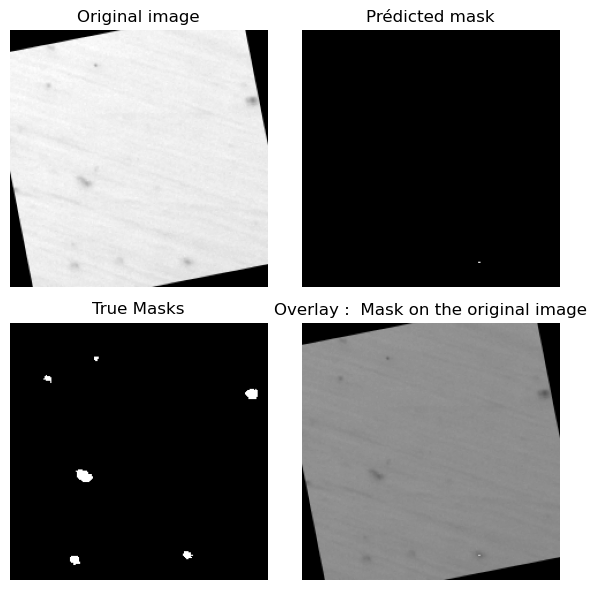

Epoch 10 Train Loss 0.02579606351043497 Test loss 0.03228735985855261


100%|██████████| 14/14 [00:01<00:00, 11.44it/s]


SAVE MODEL WITH LOSS : 0.030781990227599938


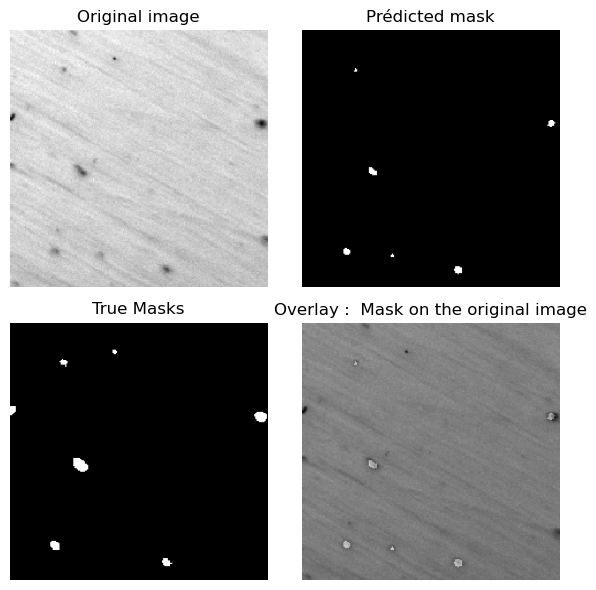

Epoch 11 Train Loss 0.022766214662364552 Test loss 0.030781990227599938


100%|██████████| 14/14 [00:01<00:00, 11.68it/s]


SAVE MODEL WITH LOSS : 0.02838939211020867


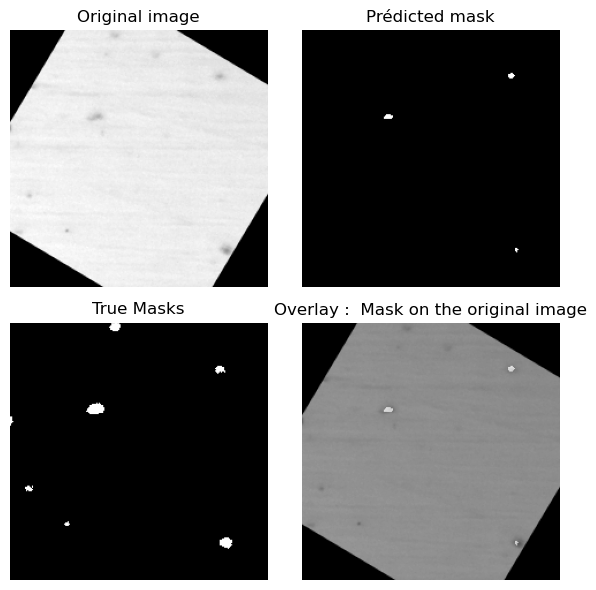

Epoch 12 Train Loss 0.020348694375050918 Test loss 0.02838939211020867


100%|██████████| 14/14 [00:01<00:00, 11.43it/s]


SAVE MODEL WITH LOSS : 0.023428927796582382


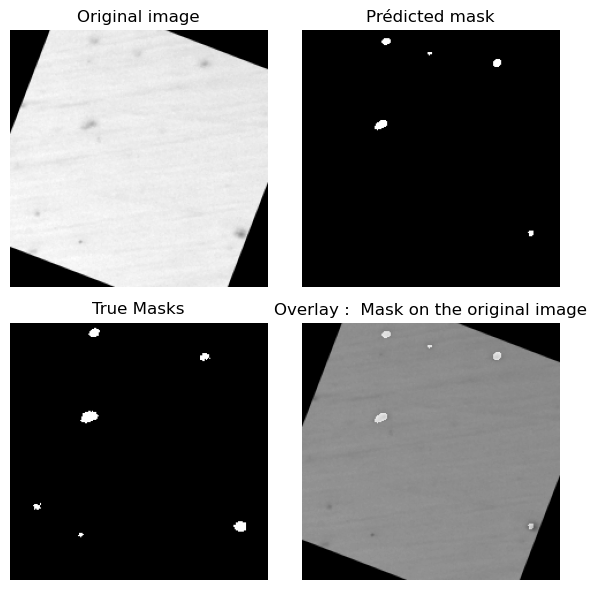

Epoch 13 Train Loss 0.019028508503522192 Test loss 0.023428927796582382


100%|██████████| 14/14 [00:01<00:00, 11.49it/s]


Epoch 14 Train Loss 0.017988248262554407 Test loss 0.026130580343306065


100%|██████████| 14/14 [00:01<00:00, 11.50it/s]


Epoch 15 Train Loss 0.01582654213000621 Test loss 0.02551631225893895


100%|██████████| 14/14 [00:01<00:00, 11.51it/s]


SAVE MODEL WITH LOSS : 0.022748651448637247


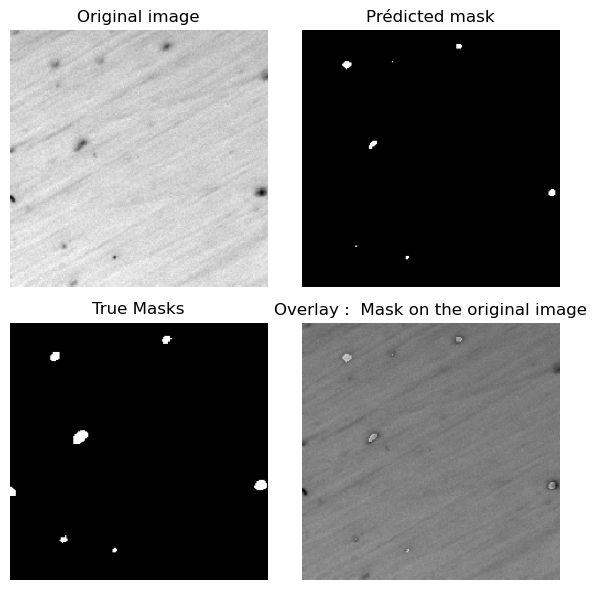

Epoch 16 Train Loss 0.015052402658121926 Test loss 0.022748651448637247


100%|██████████| 14/14 [00:01<00:00, 11.50it/s]


SAVE MODEL WITH LOSS : 0.022294324357062578


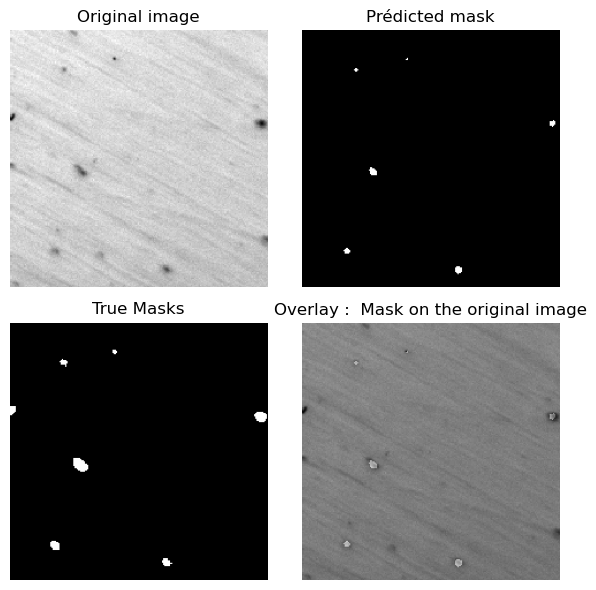

Epoch 17 Train Loss 0.014592345005699567 Test loss 0.022294324357062578


100%|██████████| 14/14 [00:01<00:00, 11.62it/s]


SAVE MODEL WITH LOSS : 0.021520011747876804


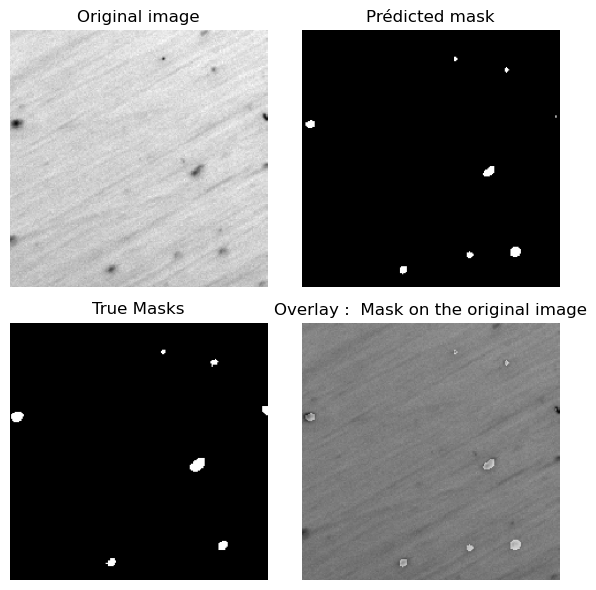

Epoch 18 Train Loss 0.01444097442020263 Test loss 0.021520011747876804


100%|██████████| 14/14 [00:01<00:00, 11.64it/s]


SAVE MODEL WITH LOSS : 0.01887678758551677


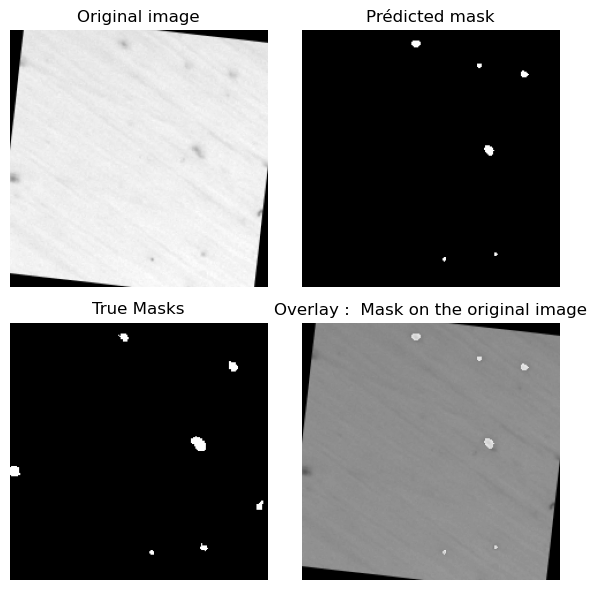

Epoch 19 Train Loss 0.014242040658635753 Test loss 0.01887678758551677


100%|██████████| 14/14 [00:01<00:00, 11.43it/s]


Epoch 20 Train Loss 0.012731140745537621 Test loss 0.020813008459905784


100%|██████████| 14/14 [00:01<00:00, 11.68it/s]


SAVE MODEL WITH LOSS : 0.01862375329559048


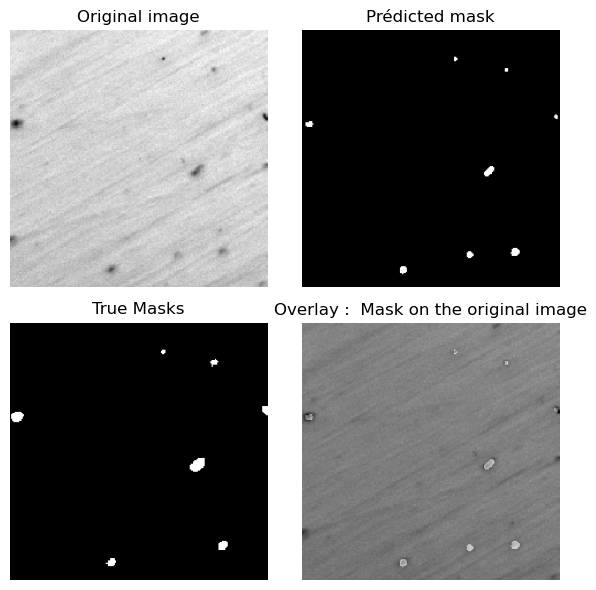

Epoch 21 Train Loss 0.011938329287139433 Test loss 0.01862375329559048


100%|██████████| 14/14 [00:01<00:00, 11.59it/s]


Epoch 22 Train Loss 0.012483182230166026 Test loss 0.022123985923826694


100%|██████████| 14/14 [00:01<00:00, 11.48it/s]


Epoch 23 Train Loss 0.011777836064408933 Test loss 0.018628824191788834


100%|██████████| 14/14 [00:01<00:00, 11.64it/s]


Epoch 24 Train Loss 0.01097247882613114 Test loss 0.020425671401123207


100%|██████████| 14/14 [00:01<00:00, 11.55it/s]


Epoch 25 Train Loss 0.011291806419779147 Test loss 0.02138480373347799


100%|██████████| 14/14 [00:01<00:00, 11.56it/s]


SAVE MODEL WITH LOSS : 0.017440222669392824


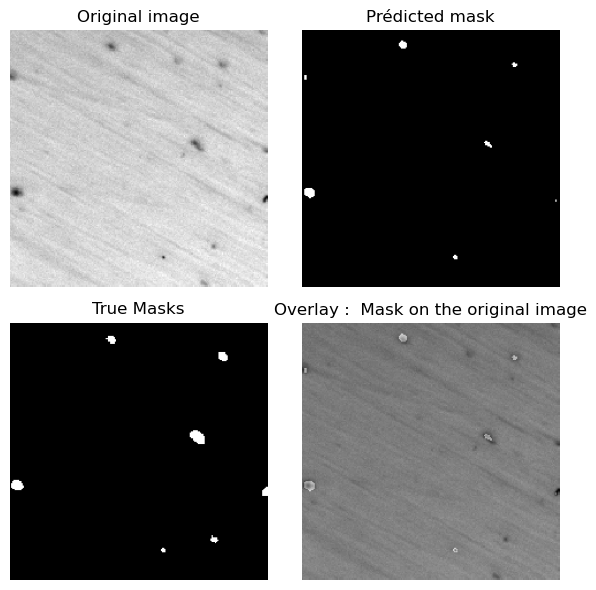

Epoch 26 Train Loss 0.011168093852964895 Test loss 0.017440222669392824


100%|██████████| 14/14 [00:01<00:00, 11.63it/s]


Epoch 27 Train Loss 0.011563112759696586 Test loss 0.01979318882028262


100%|██████████| 14/14 [00:01<00:00, 11.57it/s]


Epoch 28 Train Loss 0.010535754030570388 Test loss 0.01828141851971547


100%|██████████| 14/14 [00:01<00:00, 11.59it/s]


Epoch 29 Train Loss 0.009975905896031432 Test loss 0.01899310713633895


100%|██████████| 14/14 [00:01<00:00, 11.56it/s]


Epoch 30 Train Loss 0.0090404622522848 Test loss 0.018261549063026905


100%|██████████| 14/14 [00:01<00:00, 11.67it/s]


Epoch 31 Train Loss 0.010358214444879974 Test loss 0.01877478618795673


100%|██████████| 14/14 [00:01<00:00, 11.57it/s]


SAVE MODEL WITH LOSS : 0.016722132607052725


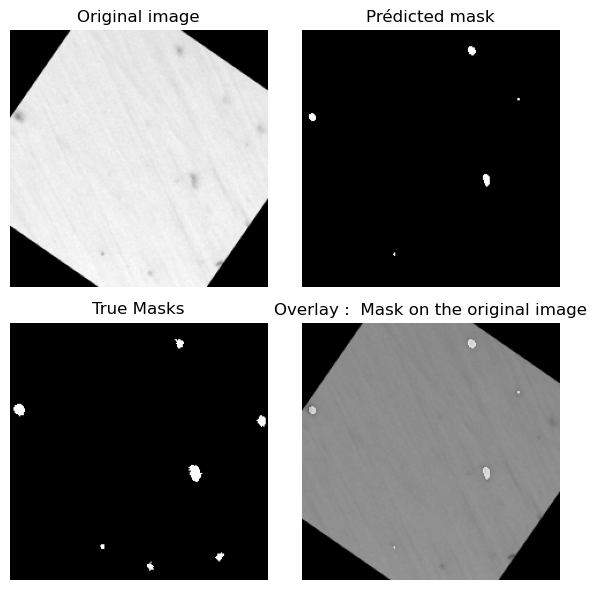

Epoch 32 Train Loss 0.009347655943461828 Test loss 0.016722132607052725


100%|██████████| 14/14 [00:01<00:00, 11.52it/s]


SAVE MODEL WITH LOSS : 0.016404345942040283


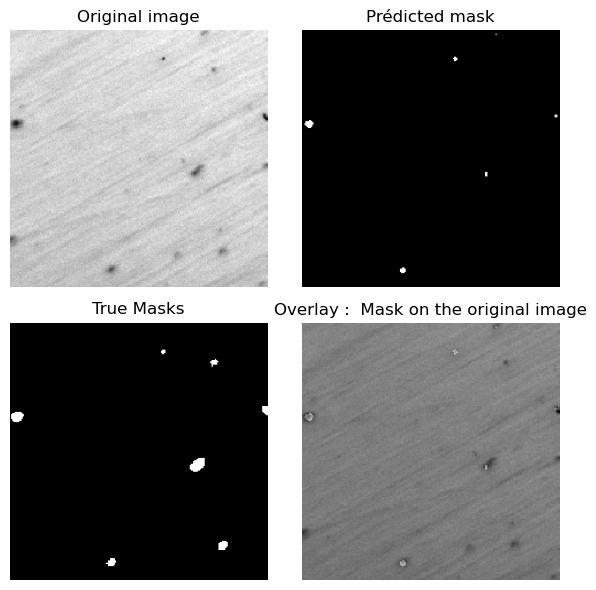

Epoch 33 Train Loss 0.010276093580094832 Test loss 0.016404345942040283


100%|██████████| 14/14 [00:01<00:00, 11.54it/s]


Epoch 34 Train Loss 0.009577761104862605 Test loss 0.018452719940493505


100%|██████████| 14/14 [00:01<00:00, 11.53it/s]


Epoch 35 Train Loss 0.009058885941548007 Test loss 0.019010362370560568


100%|██████████| 14/14 [00:01<00:00, 11.56it/s]


SAVE MODEL WITH LOSS : 0.01444717450067401


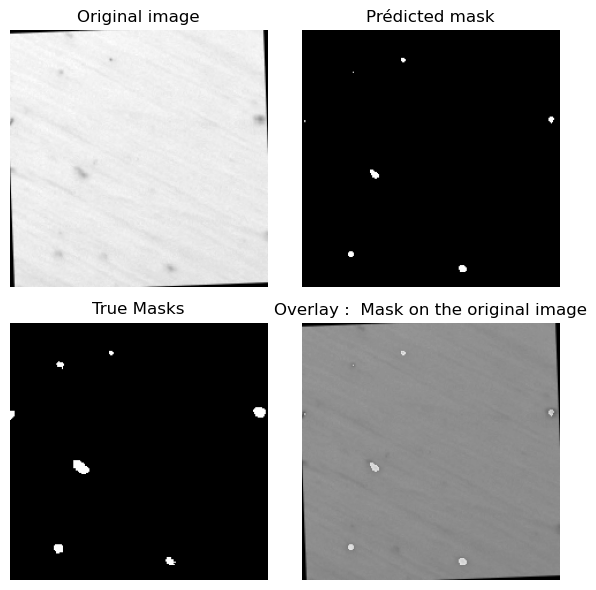

Epoch 36 Train Loss 0.008437650610825844 Test loss 0.01444717450067401


100%|██████████| 14/14 [00:01<00:00, 11.45it/s]


Epoch 37 Train Loss 0.00956167877718274 Test loss 0.016455680908014376


100%|██████████| 14/14 [00:01<00:00, 11.47it/s]


Epoch 38 Train Loss 0.009201080837686147 Test loss 0.016052885446697474


100%|██████████| 14/14 [00:01<00:00, 11.35it/s]


Epoch 39 Train Loss 0.008519692978422557 Test loss 0.01688425475731492


100%|██████████| 14/14 [00:01<00:00, 11.46it/s]


Epoch 40 Train Loss 0.009384976367333106 Test loss 0.016023998924841482


100%|██████████| 14/14 [00:01<00:00, 11.56it/s]


Epoch 41 Train Loss 0.008436576496543629 Test loss 0.017162401772414643


100%|██████████| 14/14 [00:01<00:00, 11.28it/s]


Epoch 42 Train Loss 0.008371947981816317 Test loss 0.016546880671133597


100%|██████████| 14/14 [00:01<00:00, 11.58it/s]


Epoch 43 Train Loss 0.007644222633514021 Test loss 0.01579981956941386


100%|██████████| 14/14 [00:01<00:00, 11.60it/s]


Epoch 44 Train Loss 0.007782678319407361 Test loss 0.015359122616549334


100%|██████████| 14/14 [00:01<00:00, 11.59it/s]


Epoch 45 Train Loss 0.00763186754193157 Test loss 0.018198079041515786


100%|██████████| 14/14 [00:01<00:00, 11.57it/s]


Epoch 46 Train Loss 0.007570487247513873 Test loss 0.019832929441084463


100%|██████████| 14/14 [00:01<00:00, 11.58it/s]


Epoch 47 Train Loss 0.008383132334399437 Test loss 0.015056699980050325


100%|██████████| 14/14 [00:01<00:00, 11.59it/s]


SAVE MODEL WITH LOSS : 0.0137617241901656


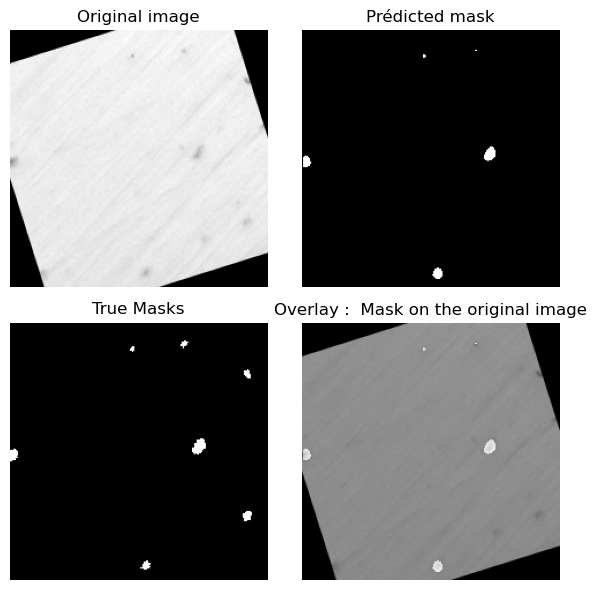

Epoch 48 Train Loss 0.008011938272310155 Test loss 0.0137617241901656


100%|██████████| 14/14 [00:01<00:00, 11.57it/s]


Epoch 49 Train Loss 0.008097731924083616 Test loss 0.01896658493205905


100%|██████████| 14/14 [00:01<00:00, 11.60it/s]


Epoch 50 Train Loss 0.007222245414076107 Test loss 0.014499072761585316


100%|██████████| 14/14 [00:01<00:00, 11.46it/s]


Epoch 51 Train Loss 0.007488324938874159 Test loss 0.01837281308447321


100%|██████████| 14/14 [00:01<00:00, 11.49it/s]


Epoch 52 Train Loss 0.007014341186732054 Test loss 0.01632802599730591


100%|██████████| 14/14 [00:01<00:00, 11.58it/s]


SAVE MODEL WITH LOSS : 0.013471387171496948


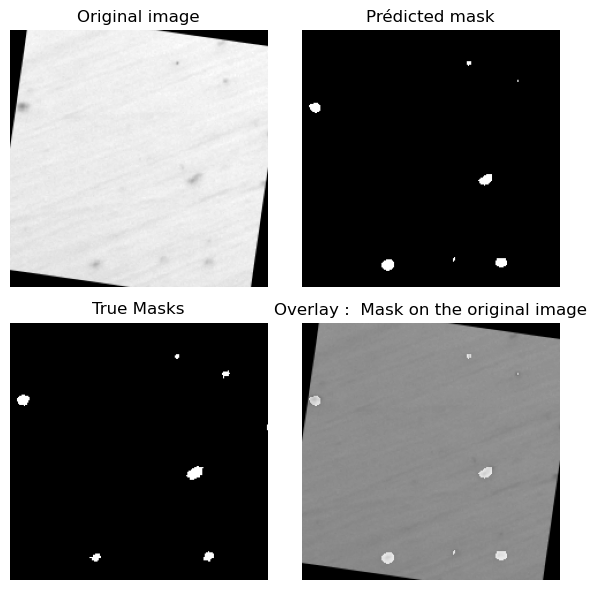

Epoch 53 Train Loss 0.006753472062493009 Test loss 0.013471387171496948


100%|██████████| 14/14 [00:01<00:00, 11.59it/s]


Epoch 54 Train Loss 0.007290367935118931 Test loss 0.019155843028177817


100%|██████████| 14/14 [00:01<00:00, 11.60it/s]


Epoch 55 Train Loss 0.006273285968096128 Test loss 0.014045207916448513


100%|██████████| 14/14 [00:01<00:00, 11.55it/s]


Epoch 56 Train Loss 0.0063744598467435154 Test loss 0.014417249631757537


100%|██████████| 14/14 [00:01<00:00, 11.64it/s]


Epoch 57 Train Loss 0.006298440641590527 Test loss 0.013699702297647795


100%|██████████| 14/14 [00:01<00:00, 11.46it/s]


Epoch 58 Train Loss 0.006573218270204961 Test loss 0.014451681481053432


100%|██████████| 14/14 [00:01<00:00, 11.46it/s]


Epoch 59 Train Loss 0.006507176689670554 Test loss 0.014489912893623114


100%|██████████| 14/14 [00:01<00:00, 11.57it/s]


Epoch 60 Train Loss 0.006624687895444887 Test loss 0.013719601789489388


100%|██████████| 14/14 [00:01<00:00, 11.60it/s]


Epoch 61 Train Loss 0.006751674959169967 Test loss 0.013949008425697684


100%|██████████| 14/14 [00:01<00:00, 11.45it/s]


Epoch 62 Train Loss 0.0062482631765306 Test loss 0.014850469150890907


100%|██████████| 14/14 [00:01<00:00, 11.42it/s]


Epoch 63 Train Loss 0.006287962963272419 Test loss 0.013912085831786195


100%|██████████| 14/14 [00:01<00:00, 11.43it/s]


SAVE MODEL WITH LOSS : 0.012889061433573564


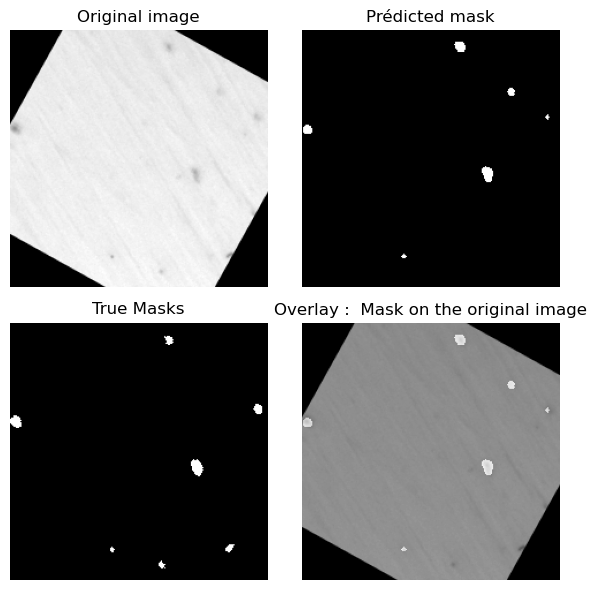

Epoch 64 Train Loss 0.006025522082511868 Test loss 0.012889061433573564


100%|██████████| 14/14 [00:01<00:00, 11.43it/s]


Epoch 65 Train Loss 0.0062093023443594575 Test loss 0.013126325172682604


100%|██████████| 14/14 [00:01<00:00, 11.50it/s]


Epoch 66 Train Loss 0.0068320931667195895 Test loss 0.01373864927639564


100%|██████████| 14/14 [00:01<00:00, 11.39it/s]


Epoch 67 Train Loss 0.006062165784117367 Test loss 0.01414656980584065


100%|██████████| 14/14 [00:01<00:00, 11.42it/s]


Epoch 68 Train Loss 0.005442229798063636 Test loss 0.013878533927102884


100%|██████████| 14/14 [00:01<00:00, 11.37it/s]


Epoch 69 Train Loss 0.006113618595658669 Test loss 0.014774444357802471


100%|██████████| 14/14 [00:01<00:00, 11.43it/s]


Epoch 70 Train Loss 0.005825653223187796 Test loss 0.015359592624008656


100%|██████████| 14/14 [00:01<00:00, 11.53it/s]


Epoch 71 Train Loss 0.0058650552361671415 Test loss 0.014167605433613062


100%|██████████| 14/14 [00:01<00:00, 11.52it/s]


Epoch 72 Train Loss 0.006526056078395673 Test loss 0.016958209375540417


100%|██████████| 14/14 [00:01<00:00, 11.53it/s]


SAVE MODEL WITH LOSS : 0.01212542224675417


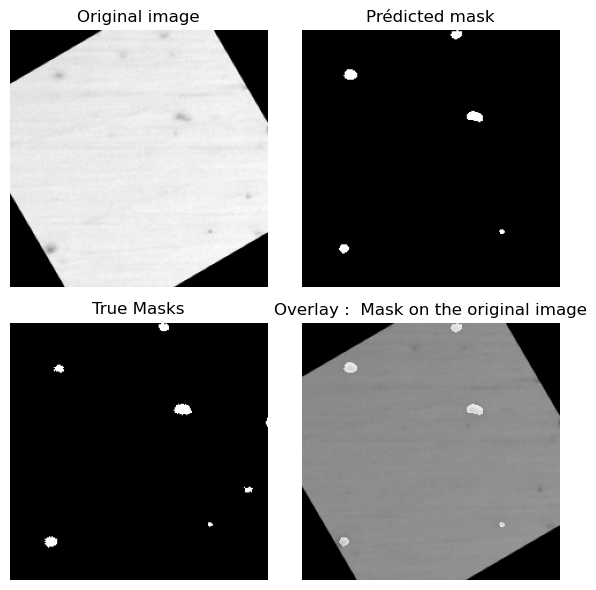

Epoch 73 Train Loss 0.005395711516030133 Test loss 0.01212542224675417


100%|██████████| 14/14 [00:01<00:00, 11.38it/s]


Epoch 74 Train Loss 0.005483934140231993 Test loss 0.016613400851686794


100%|██████████| 14/14 [00:01<00:00, 11.55it/s]


Epoch 75 Train Loss 0.006270698537783963 Test loss 0.019310147346307833


100%|██████████| 14/14 [00:01<00:00, 11.51it/s]


Epoch 76 Train Loss 0.005512542806432715 Test loss 0.01417034127128621


100%|██████████| 14/14 [00:01<00:00, 11.33it/s]


Epoch 77 Train Loss 0.0062209393030830794 Test loss 0.014533702827369174


100%|██████████| 14/14 [00:01<00:00, 11.23it/s]


SAVE MODEL WITH LOSS : 0.01188579589749376


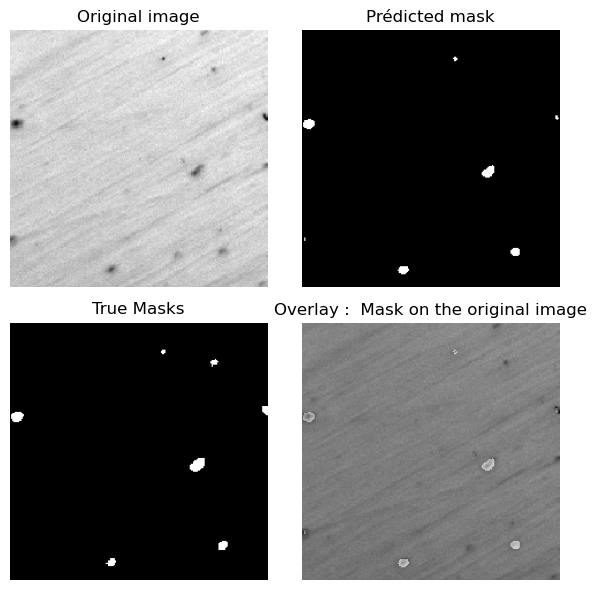

Epoch 78 Train Loss 0.00561800816961165 Test loss 0.01188579589749376


100%|██████████| 14/14 [00:01<00:00, 11.35it/s]


Epoch 79 Train Loss 0.007976864763934697 Test loss 0.015880538538719218


100%|██████████| 14/14 [00:01<00:00, 11.17it/s]


Epoch 80 Train Loss 0.006946533053581204 Test loss 0.015469217595333854


100%|██████████| 14/14 [00:01<00:00, 11.25it/s]


Epoch 81 Train Loss 0.007044979421022747 Test loss 0.014217308567216


100%|██████████| 14/14 [00:01<00:00, 11.25it/s]


Epoch 82 Train Loss 0.006028571881220809 Test loss 0.014992930305500826


100%|██████████| 14/14 [00:01<00:00, 11.38it/s]


Epoch 83 Train Loss 0.005971128553418177 Test loss 0.01494026331541439


100%|██████████| 14/14 [00:01<00:00, 11.43it/s]


Epoch 84 Train Loss 0.005217513801263911 Test loss 0.016574129307021696


100%|██████████| 14/14 [00:01<00:00, 11.32it/s]


Epoch 85 Train Loss 0.0055870864640123075 Test loss 0.015781061102946598


100%|██████████| 14/14 [00:01<00:00, 11.37it/s]


Epoch 86 Train Loss 0.005438294037178691 Test loss 0.016690338185677927


100%|██████████| 14/14 [00:01<00:00, 11.51it/s]


Epoch 87 Train Loss 0.005487578937650791 Test loss 0.012748783687129617


100%|██████████| 14/14 [00:01<00:00, 11.35it/s]


Epoch 88 Train Loss 0.006033057230524719 Test loss 0.01846785090553264


100%|██████████| 14/14 [00:01<00:00, 11.09it/s]


Epoch 89 Train Loss 0.005239097285084426 Test loss 0.014641440318276485


100%|██████████| 14/14 [00:01<00:00, 11.23it/s]


Epoch 90 Train Loss 0.004880733172675329 Test loss 0.015048005152493715


100%|██████████| 14/14 [00:01<00:00, 11.46it/s]


Epoch 91 Train Loss 0.00531262021312224 Test loss 0.014666682574898005


100%|██████████| 14/14 [00:01<00:00, 11.45it/s]


Epoch 92 Train Loss 0.004762568976730108 Test loss 0.01522508729249239


100%|██████████| 14/14 [00:01<00:00, 11.35it/s]


Epoch 93 Train Loss 0.0052312395668455535 Test loss 0.013704587860653797


100%|██████████| 14/14 [00:01<00:00, 11.33it/s]


Epoch 94 Train Loss 0.005067202046380511 Test loss 0.015893184191857774


100%|██████████| 14/14 [00:01<00:00, 11.51it/s]


Epoch 95 Train Loss 0.005386082139531416 Test loss 0.01660135171065728


100%|██████████| 14/14 [00:01<00:00, 11.48it/s]


Epoch 96 Train Loss 0.005346421110776386 Test loss 0.01290396119778355


100%|██████████| 14/14 [00:01<00:00, 11.41it/s]


Epoch 97 Train Loss 0.005575956809999687 Test loss 0.02071236725896597


100%|██████████| 14/14 [00:01<00:00, 11.38it/s]


Epoch 98 Train Loss 0.004970286989451519 Test loss 0.02029780236383279


100%|██████████| 14/14 [00:01<00:00, 11.19it/s]


Epoch 99 Train Loss 0.004885084428159254 Test loss 0.013853986980393529


100%|██████████| 14/14 [00:01<00:00, 11.42it/s]


Epoch 100 Train Loss 0.0051961097633466125 Test loss 0.019715863279998302


In [16]:
training_loss, testing_loss = training(cfg,"/home/ters-user/Documents/particle_recognition_using_CNN/", "100epochs_111imgs", dloader_train, dloader_test, model, optimizer, loss )

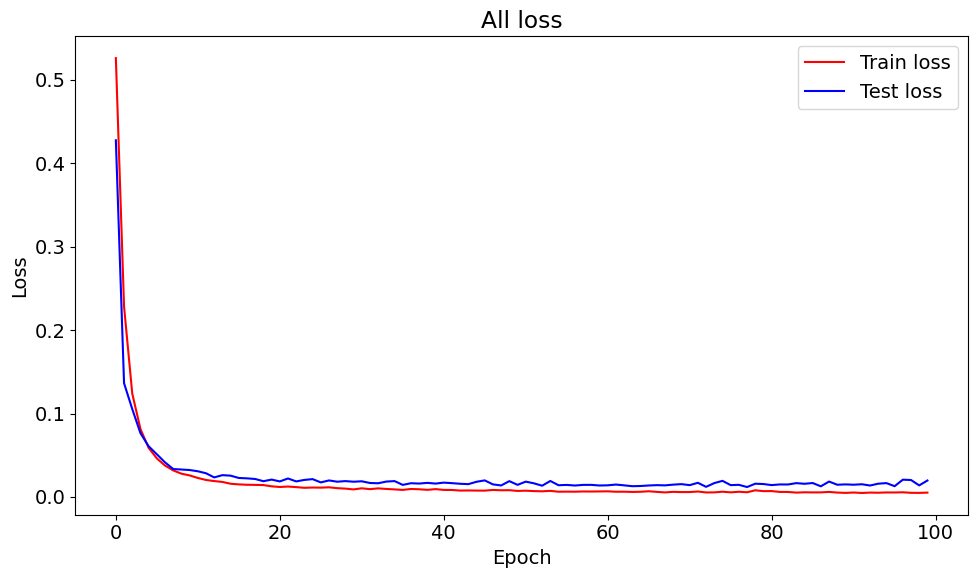

In [17]:
plot_metrics("/home/ters-user/Documents/particle_recognition_using_CNN/", "100epochs_111imgs", training_loss, testing_loss, cfg)

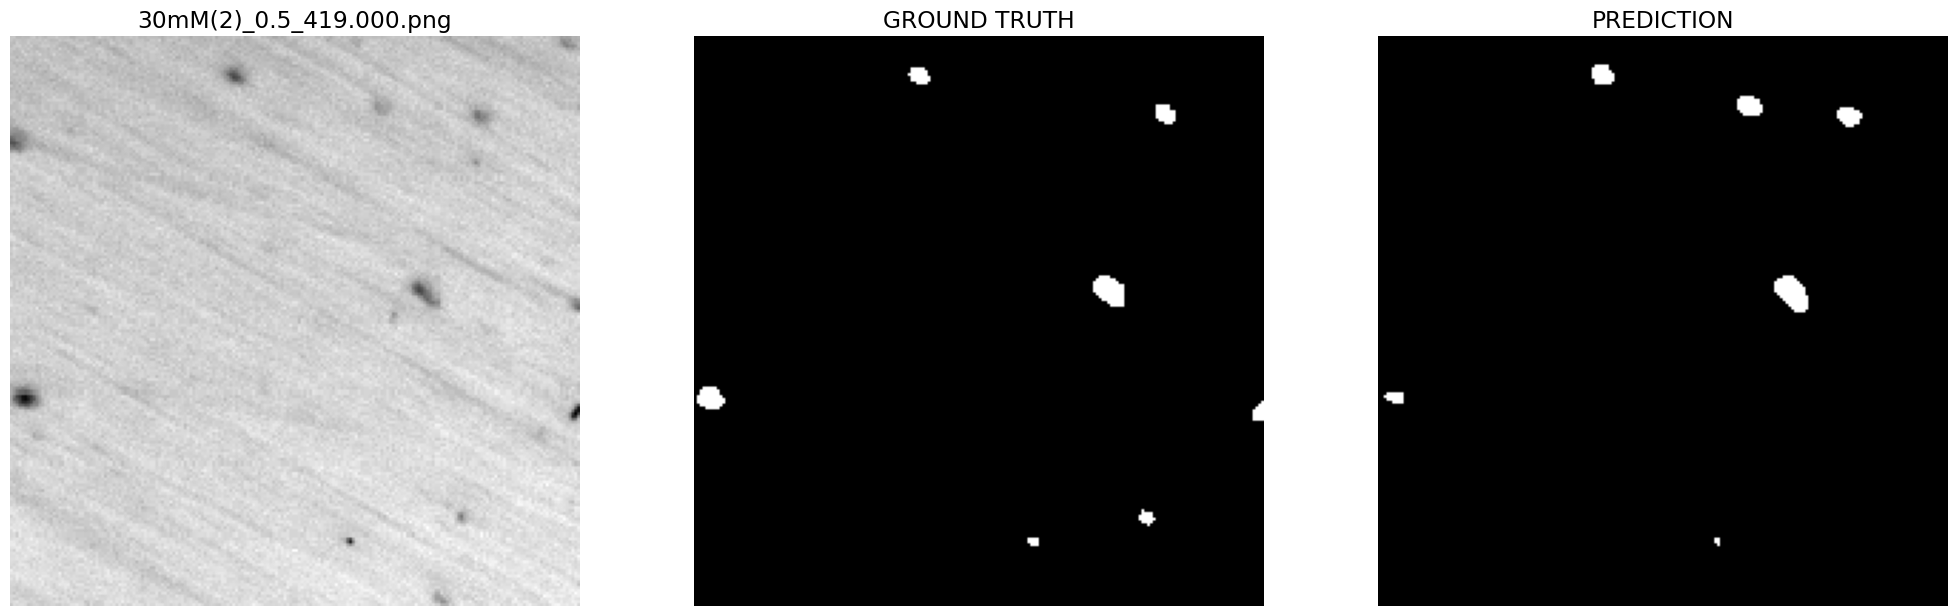

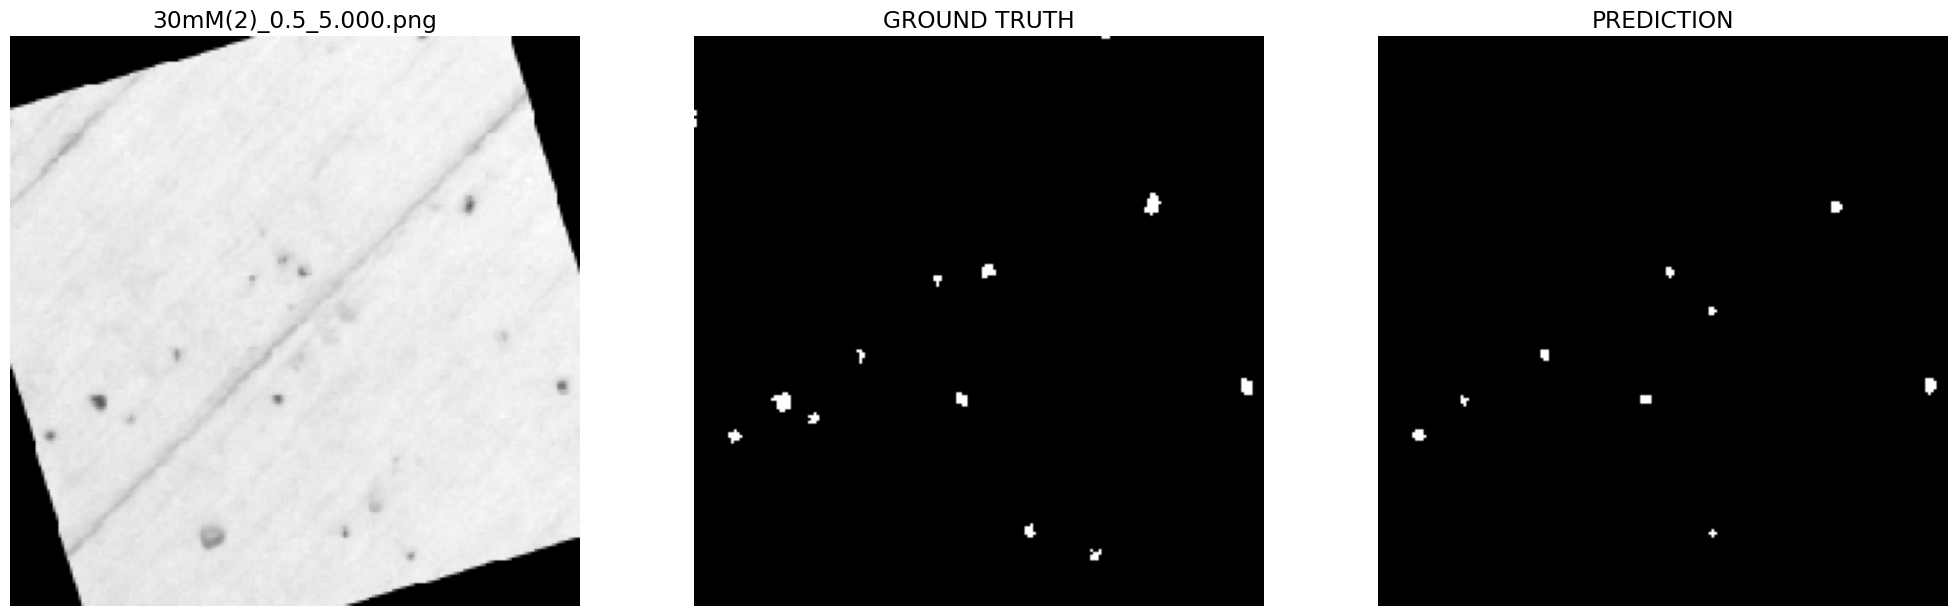

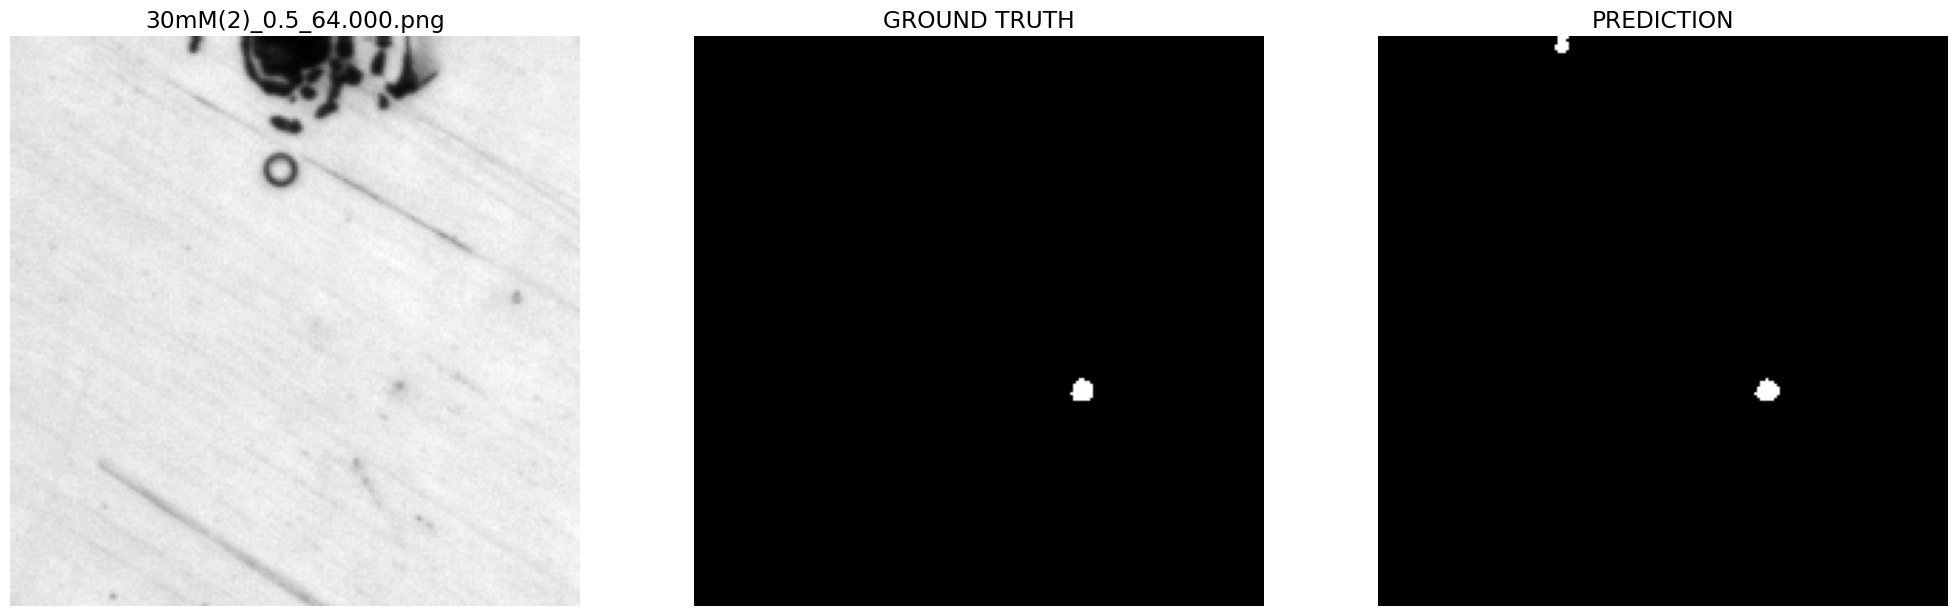

In [18]:
show_predictions(dloader_test, model, nbr_images=3)

COMPUTING METRICS ...


100%|██████████| 6/6 [00:00<00:00, 17.43it/s]


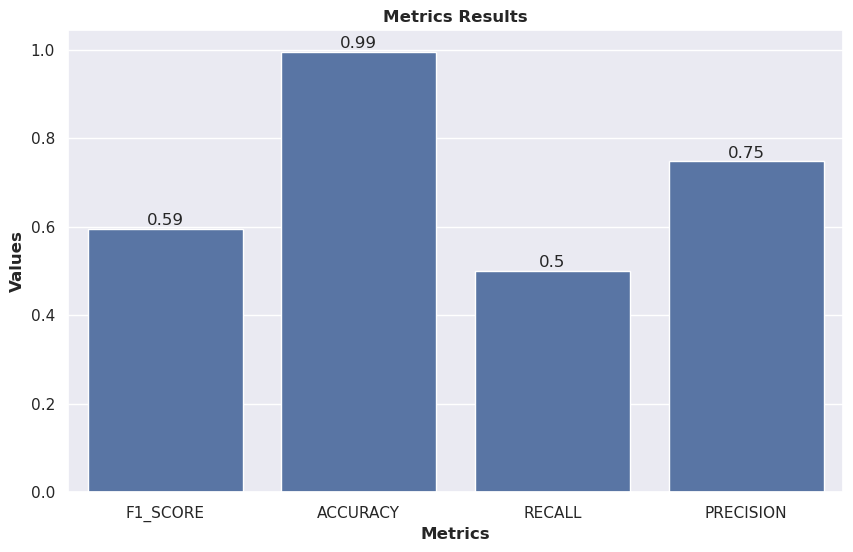

In [19]:
compute_metrics(dloader_test, model)

In [78]:
def infer_single_image(image, model, device='cuda'):
    DEVICE = torch.device(device if torch.cuda.is_available() else 'cpu')
    model.to(DEVICE)
    model.eval()

    h, w = image.shape

    # Normalisation [0,1]
    image_input = image.astype(np.float32) / 255.0
    image_input = torch.from_numpy(image_input).unsqueeze(0).unsqueeze(0).to(DEVICE)

    # 2. Inférence
    with torch.no_grad():
        output = torch.sigmoid(model(image_input))

    # 3. Post-traitement
    output = (output > 0.5).float().cpu().numpy()[0, 0]
    predicted_mask = cv.resize(output, (w, h), interpolation=cv.INTER_NEAREST)


    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.savefig("/home/ters-user/Documents/Rapport de stage/image",dpi=300)

    plt.tight_layout()
    plt.show()

In [29]:
model = torch.load('/home/ters-user/Documents/particle_recognition_using_CNN/100epochs_111imgs/best_model_microscope.pth', map_location='cpu',weights_only=False)

In [32]:
images_dir = '/home/ters-user/Documents/images_data/30mM'
images_path = [os.path.join(images_dir,img) for img in os.listdir(images_dir)]
images = [cv.imread(img, cv.IMREAD_GRAYSCALE) for img in sorted(images_path)]

In [66]:
img = images[285][623:847,1853:2077]

(224, 224)

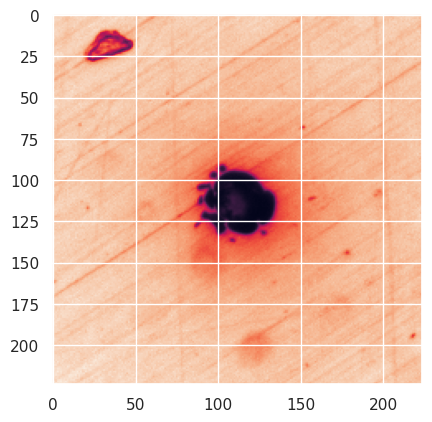

In [68]:
plt.imshow(img)
img.shape

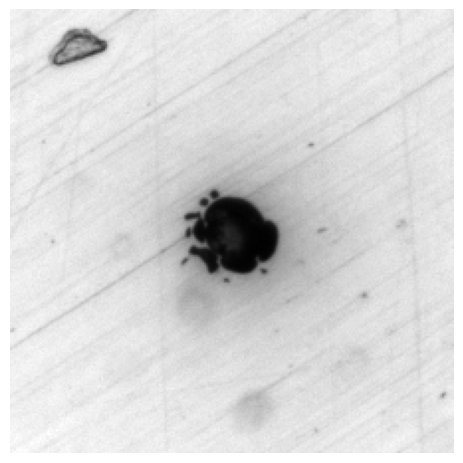

In [79]:
infer_single_image(img, model)

In [80]:
cfg

{'encoder': 'timm-efficientnet-b0',
 'weights': 'imagenet',
 'resize': 224,
 'nb_classes': 1,
 'epochs': 100,
 'lr': 0.001,
 'gamma': 0.85,
 'batch_size': 5}